In [3]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10

from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.callbacks import EarlyStopping

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print ("Training data:")
print ("Number of examples: ", X_train.shape[0])
print ("Number of channels:",X_train.shape[3])
print ("Image size:", X_train.shape[1], X_train.shape[2])
print
print ("Test data:")
print ("Number of examples:", X_test.shape[0])
print ("Number of channels:", X_test.shape[3])
print ("Image size:", X_test.shape[1], X_test.shape[2])

print(X_train.shape, X_train.dtype)
print(y_train.shape, y_train.dtype)

170498071/170498071 [==============================] - 13s 0us/step
Training data:
Number of examples:  50000
Number of channels: 3
Image size: 32 32
Test data:
Number of examples: 10000
Number of channels: 3
Image size: 32 32
(50000, 32, 32, 3) uint8
(50000, 1) uint8


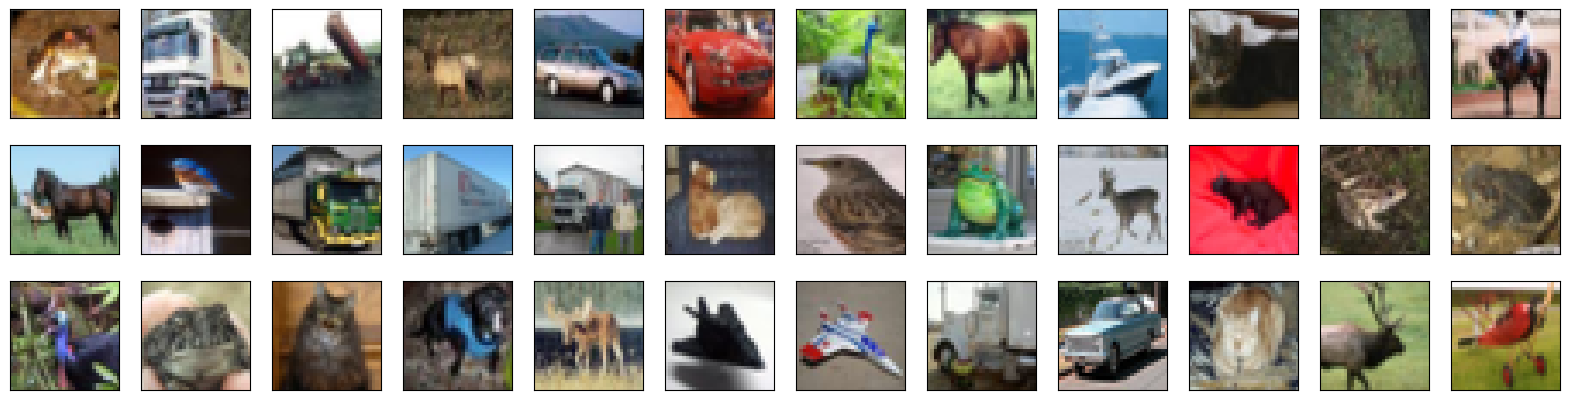

In [5]:
fig = plt.figure(figsize=(20,5))

for i in range(36):
    ax = fig.add_subplot(3, 12, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i])

In [6]:
X_train = X_train/255.0
X_test = X_test /255.0

In [7]:
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
print(Y_train.shape)
print(Y_test.shape)

(50000, 10)
(10000, 10)


In [8]:
input_shape = (32, 32, 3)     # 행, 열, 채널
from keras.layers import BatchNormalization
model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5), padding='same',
         input_shape = input_shape, activation='relu', kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (5, 5), padding='same', activation='relu', kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                        

In [10]:
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 3)
model.compile(loss = 'categorical_crossentropy', optimizer = optimizers.Adam(0.001), metrics=['accuracy'])

In [12]:
# fit() 메서드로 모델 훈련 시키기
hist = model.fit(
    X_train, Y_train,
    epochs = 20, batch_size = 128,
    validation_data=(X_test, Y_test),
    callbacks = [early_stopping]
    )

Epoch 1/20
391/391 [==============================] - 5s 13ms/step - loss: 1.6113 - accuracy: 0.4529 - val_loss: 1.3948 - val_accuracy: 0.5126
Epoch 2/20
391/391 [==============================] - 5s 12ms/step - loss: 1.2041 - accuracy: 0.5747 - val_loss: 1.0495 - val_accuracy: 0.6330
Epoch 3/20
391/391 [==============================] - 4s 11ms/step - loss: 1.0452 - accuracy: 0.6318 - val_loss: 0.9363 - val_accuracy: 0.6804
Epoch 4/20
391/391 [==============================] - 4s 10ms/step - loss: 0.9376 - accuracy: 0.6692 - val_loss: 0.9073 - val_accuracy: 0.6785
Epoch 5/20
391/391 [==============================] - 4s 11ms/step - loss: 0.8646 - accuracy: 0.6974 - val_loss: 0.9213 - val_accuracy: 0.6806
Epoch 6/20
391/391 [==============================] - 4s 10ms/step - loss: 0.7975 - accuracy: 0.7180 - val_loss: 1.1171 - val_accuracy: 0.6334
Epoch 7/20
391/391 [==============================] - 4s 10ms/step - loss: 0.7446 - accuracy: 0.7393 - val_loss: 0.8167 - val_accuracy: 0.7181

In [13]:
# 테스트 데이터로 정확도 측정하기
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('test_acc: ', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.8695 - accuracy: 0.7087
test_acc:  0.7087000012397766


In [14]:
predit = model.predict(X_test)
print(predit[0:5])
print(Y_test[0 :5])

313/313 [==============================] - 1s 2ms/step
[[1.8347580e-03 3.1148454e-03 4.6023902e-02 6.8972111e-01 1.3097527e-03
  1.9549163e-01 5.7769649e-02 1.6050019e-03 6.4828125e-04 2.4810785e-03]
 [2.1276878e-02 1.9599897e-01 1.5282052e-07 1.4178740e-08 5.4317635e-08
  4.7765791e-10 3.2596701e-09 1.2161200e-10 7.8182322e-01 9.0081611e-04]
 [4.1734591e-01 2.3698457e-02 3.4657558e-03 1.1237963e-03 2.4634378e-03
  1.0752139e-04 7.0393369e-05 7.4012343e-05 5.5005085e-01 1.5998563e-03]
 [9.9149454e-01 2.7306002e-04 1.8253974e-03 1.0572843e-05 2.4343529e-04
  7.5682003e-08 5.0817764e-08 6.5610848e-08 6.1498834e-03 3.0685685e-06]
 [3.6670392e-07 7.0418296e-06 2.7458115e-02 4.3818668e-02 5.5826324e-01
  4.7592071e-04 3.6997223e-01 4.4026297e-07 3.5200637e-06 4.7192708e-07]]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


313/313 [==============================] - 1s 3ms/step


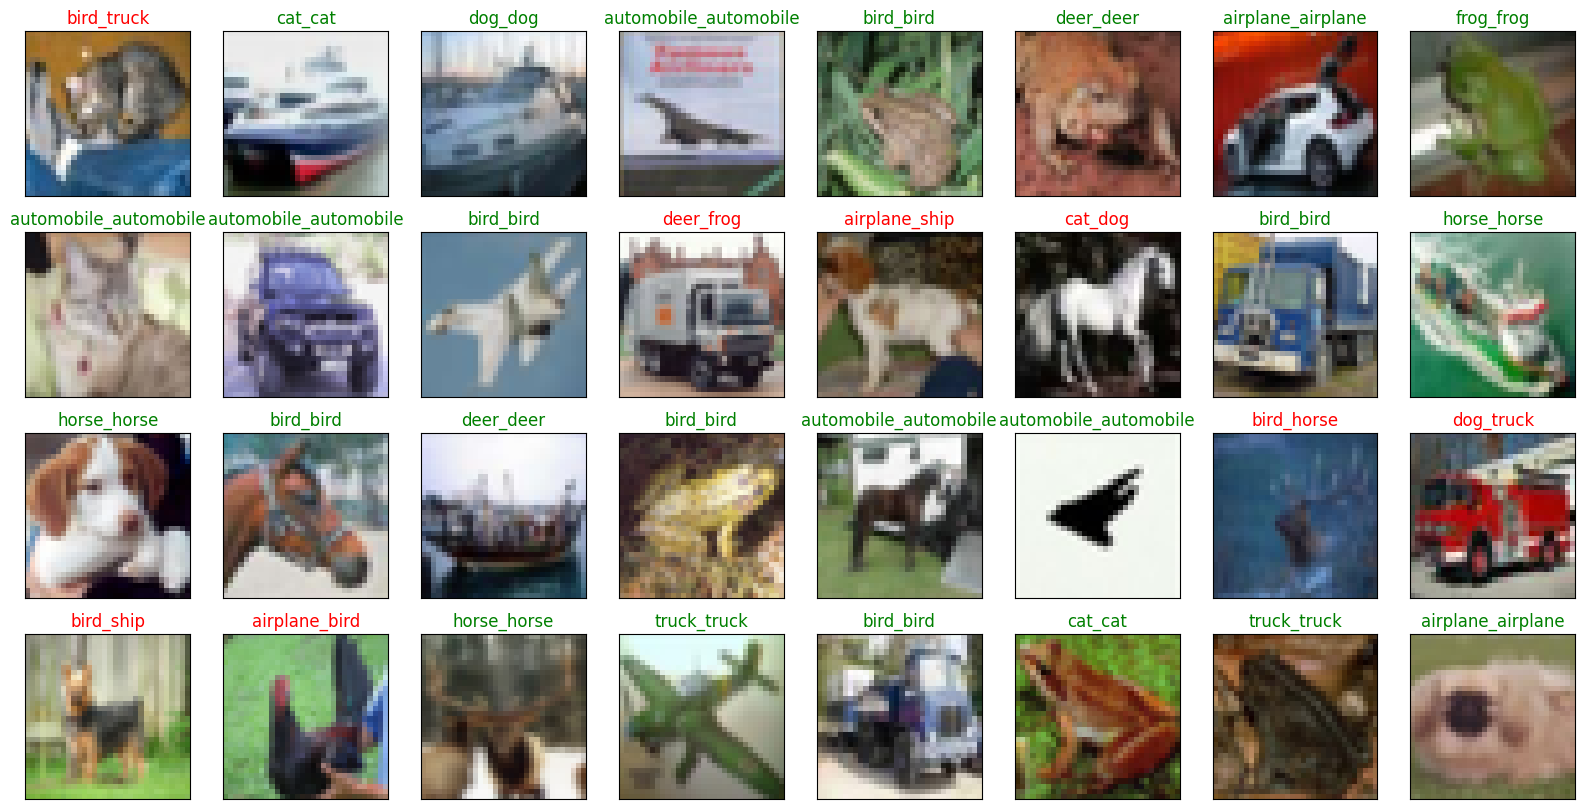

In [15]:
pred = model.predict(X_test)
label = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig = plt.figure(figsize=(20,10))

for i, idx in enumerate(np.random.choice(X_test.shape[0], size=32)):
    ax = fig.add_subplot(4,8, i+1 , xticks=[], yticks=[])
    ax.imshow(X_test[i])

    pred_idx = np.argmax(pred[idx])
    true_idx = np.argmax(Y_test[idx])

    ax.set_title("{}_{}".format(label[pred_idx], label[true_idx]), color='green' if pred_idx == true_idx else 'red')